In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt 

In [3]:
import numpy as np
import pandas as pd 


In [4]:
import datetime as dt  

In [5]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func 

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite") 

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys() 


['measurement', 'station']

In [8]:
   # Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station 

 

In [9]:
  # Create our session (link) from Python to the DB
session = Session(engine)  
 

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

precipitation12 = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-24').all()

df_precipitation12 = pd.DataFrame(precipitation12)

df_precipitation12.head()


,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


<BarContainer object of 2223 artists>

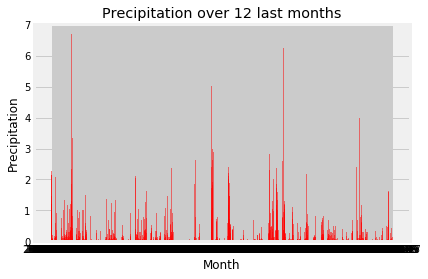

In [11]:


# Define labels
plt.title("Precipitation over 12 last months")
plt.xlabel("Month")
plt.ylabel("Precipitation")

# Define plot

plt.bar(df_precipitation12["date"], df_precipitation12["prcp"], color='r', alpha=0.5, align="center")


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data  
    
df_precipitation12.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
  # Design a query to show how many stations are available in this dataset?

session.query(Station.station).count()
    


9

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.



session.query(Measurement.station, func.count(Measurement.prcp)).group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [15]:
   # Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
 
session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).group_by(Measurement.station).all()



[('USC00511918', 53.0, 87.0, 71.61596766043456),
 ('USC00513117', 59.0, 85.0, 72.68918420081211),
 ('USC00514830', 58.0, 85.0, 74.8732970027248),
 ('USC00516128', 58.0, 84.0, 70.91500765696784),
 ('USC00517948', 58.0, 87.0, 74.68440233236151),
 ('USC00518838', 58.0, 83.0, 72.72407045009784),
 ('USC00519281', 54.0, 85.0, 71.66378066378067),
 ('USC00519397', 56.0, 87.0, 74.55323054331865),
 ('USC00519523', 56.0, 85.0, 74.5436493068565)]

In [34]:
   # Choose the station with the highest number of temperature observations.
    
session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
  

    
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram





[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [41]:

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

months=session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station=="USC00519281").all()

df_months = pd.DataFrame(months)

df_months.head()

,station,date,tobs
0,USC00519281,2010-01-01,70.0
1,USC00519281,2010-01-02,62.0
2,USC00519281,2010-01-03,74.0
3,USC00519281,2010-01-04,75.0
4,USC00519281,2010-01-05,74.0


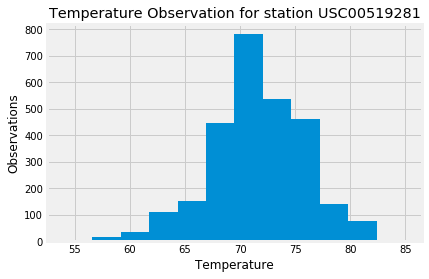

In [53]:
plt.hist(df_months['tobs'], bins=12)


plt.xlabel('Temperature')
plt.ylabel('Observations')
plt.title('Temperature Observation for station USC00519281')
plt.show()


In [56]:
 # This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [58]:
   # Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
 
trip_temps= calc_temps('2017-02-28', '2017-03-05')  